In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, mean_squared_error,
                             confusion_matrix, roc_curve, roc_auc_score,
                             precision_recall_curve, classification_report)




## **TRAINING AND TESTING THE MODEL**

In [38]:
# Load the dataset
file_path = 'modified_irrigation_dataset.csv'  # Update this path with your file location
data = pd.read_csv(file_path)

# Split the dataset into features and target
X = data[['Moisture', 'Temperature', 'Humidity']]
y = data['Irrigation_Needed']

outliers_indices = np.random.choice(data.index, size=int(0.05 * len(data)), replace=False)
data.loc[outliers_indices, ['Moisture', 'Temperature', 'Humidity']] += np.random.normal(1000, 300, (len(outliers_indices), 3))

# 2. Introduce non-linear and interaction terms to challenge linearity assumption of Logistic Regression
data['Moisture_Temp_Interaction'] = data['Moisture'] * data['Temperature']
data['Humidity_Squared'] = data['Humidity'] ** 2

# Update the features to include these new terms
X = data[['Moisture', 'Temperature', 'Humidity', 'Moisture_Temp_Interaction', 'Humidity_Squared']]

# 3. Introduce label noise to 5% of the data
label_flip_indices = np.random.choice(data.index, size=int(0.05 * len(data)), replace=False)
y.loc[label_flip_indices] = 1 - y.loc[label_flip_indices]



# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-38-6d56039de154>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[label_flip_indices] = 1 - y.loc[label_flip_indices]


In [39]:
# Initialize and train the models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(probability=True, random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
svc_clf_pred = svc_clf.predict(X_test)

## **ERROR ANALYSIS**

In [40]:
# Probabilities for ROC/AUC and Precision-Recall curves
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
rf_clf_prob = rf_clf.predict_proba(X_test)[:, 1]
svc_clf_prob = svc_clf.predict_proba(X_test)[:, 1]

# Evaluate the models: Accuracy, MSE, MAE, RMSE
log_reg_acc = accuracy_score(y_test, log_reg_pred)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)
svc_clf_acc = accuracy_score(y_test, svc_clf_pred)

log_reg_mse = mean_squared_error(y_test, log_reg_pred)
rf_clf_mse = mean_squared_error(y_test, rf_clf_pred)
svc_clf_mse = mean_squared_error(y_test, svc_clf_pred)

log_reg_mae = np.mean(np.abs(y_test - log_reg_pred))
rf_clf_mae = np.mean(np.abs(y_test - rf_clf_pred))
svc_clf_mae = np.mean(np.abs(y_test - svc_clf_pred))

log_reg_rmse = np.sqrt(log_reg_mse)
rf_clf_rmse = np.sqrt(rf_clf_mse)
svc_clf_rmse = np.sqrt(svc_clf_mse)

# Store the results in a DataFrame
model_comparison = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Classifier'],
    'Accuracy': [log_reg_acc, rf_clf_acc, svc_clf_acc],
    'MSE': [log_reg_mse, rf_clf_mse, svc_clf_mse],
    'MAE': [log_reg_mae, rf_clf_mae, svc_clf_mae],
    'RMSE': [log_reg_rmse, rf_clf_rmse, svc_clf_rmse]
}

comparison_df = pd.DataFrame(model_comparison)



## **VISUALISATIONS**

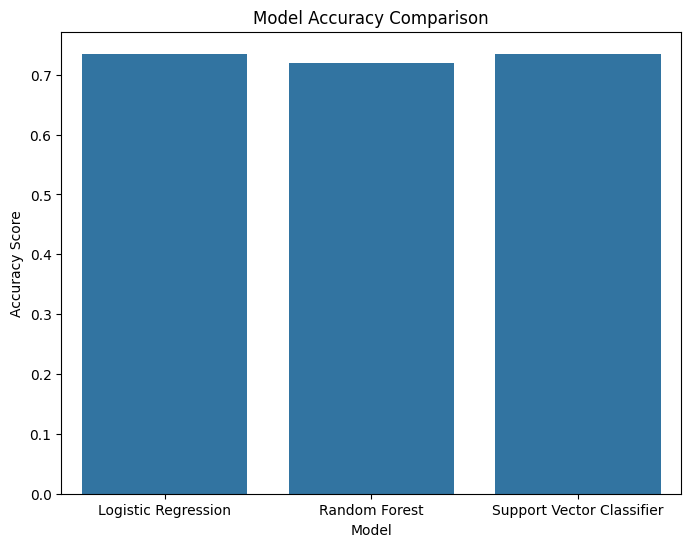

In [41]:
# 1. Accuracy Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.show()



Error Data for Plotting:
                       Model    MSE    MAE      RMSE
0        Logistic Regression  0.265  0.265  0.514782
1              Random Forest  0.280  0.280  0.529150
2  Support Vector Classifier  0.265  0.265  0.514782

Melted Error Data:
                       Model Error Metric     Score
0        Logistic Regression          MSE  0.265000
1              Random Forest          MSE  0.280000
2  Support Vector Classifier          MSE  0.265000
3        Logistic Regression          MAE  0.265000
4              Random Forest          MAE  0.280000
5  Support Vector Classifier          MAE  0.265000
6        Logistic Regression         RMSE  0.514782
7              Random Forest         RMSE  0.529150
8  Support Vector Classifier         RMSE  0.514782


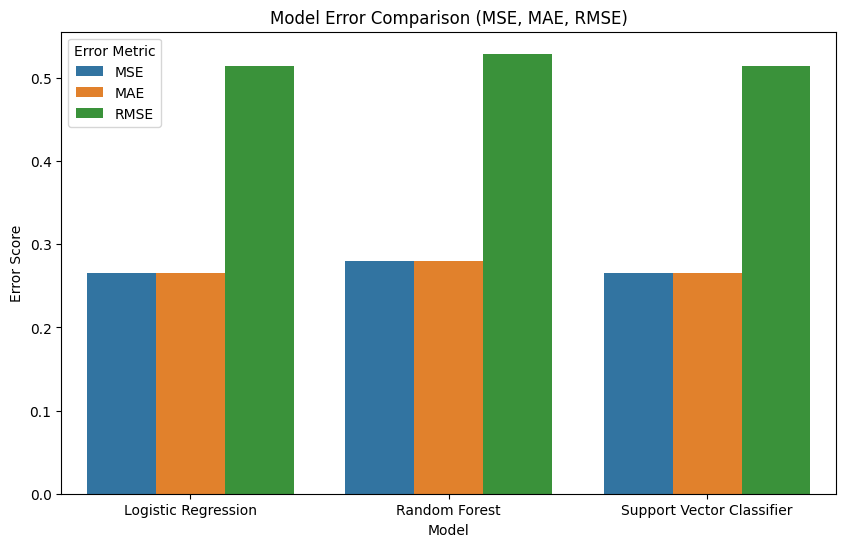

In [42]:
# 2. Error Comparison (MSE, MAE, RMSE) Bar Plot
# Calculate the errors and put them in a DataFrame
error_data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Classifier'],
    'MSE': [log_reg_mse, rf_clf_mse, svc_clf_mse],
    'MAE': [log_reg_mae, rf_clf_mae, svc_clf_mae],
    'RMSE': [log_reg_rmse, rf_clf_rmse, svc_clf_rmse]
})

# Print the DataFrame to ensure values are calculated correctly
print("\nError Data for Plotting:")
print(error_data)

# Melt the DataFrame to have a long format suitable for bar plot
error_data_melted = error_data.melt(id_vars='Model', value_vars=['MSE', 'MAE', 'RMSE'],
                                   var_name='Error Metric', value_name='Score')

# Print the melted DataFrame for debugging
print("\nMelted Error Data:")
print(error_data_melted)

# Now plot the error metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Error Metric', data=error_data_melted)
plt.title('Model Error Comparison (MSE, MAE, RMSE)')
plt.ylabel('Error Score')
plt.show()




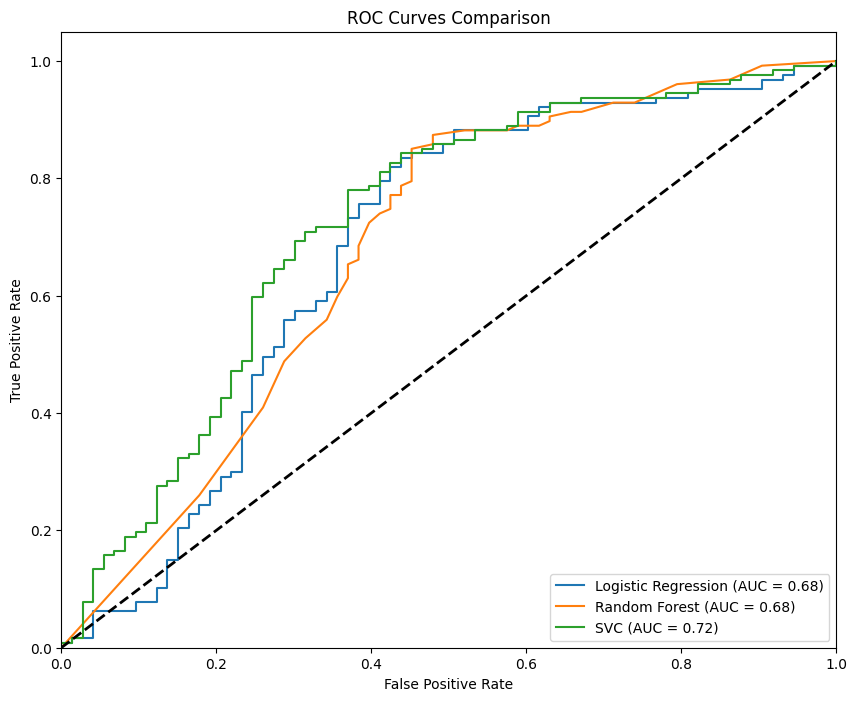

In [43]:
# 3. ROC Curves for all models
plt.figure(figsize=(10, 8))
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf_prob)
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_clf_prob)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, log_reg_prob):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_clf_prob):.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_score(y_test, svc_clf_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

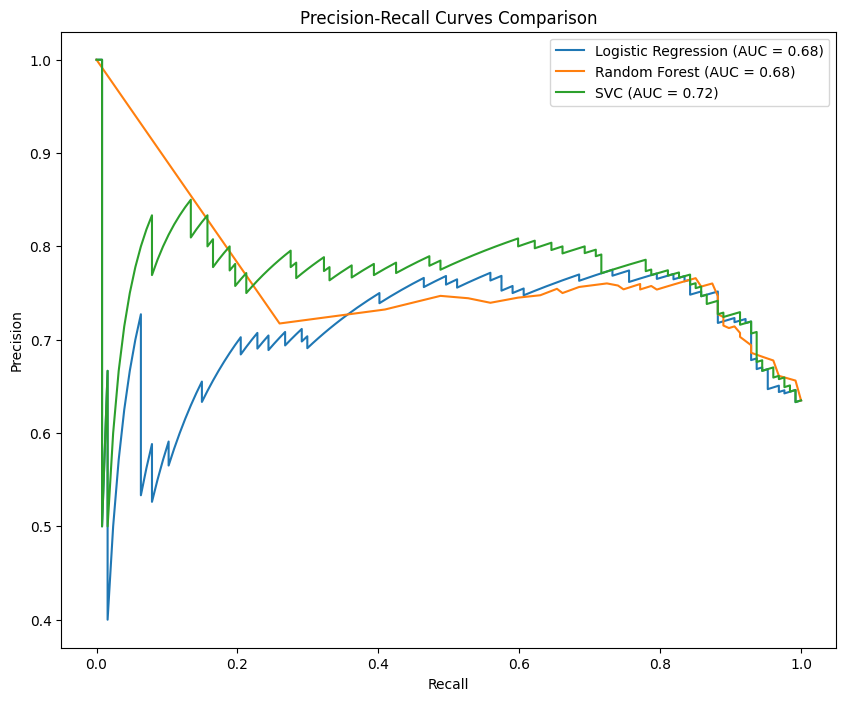

In [44]:
# 4. Precision-Recall Curves for all models
plt.figure(figsize=(10, 8))
prec_log, rec_log, _ = precision_recall_curve(y_test, log_reg_prob)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_clf_prob)
prec_svc, rec_svc, _ = precision_recall_curve(y_test, svc_clf_prob)

plt.plot(rec_log, prec_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, log_reg_prob):.2f})')
plt.plot(rec_rf, prec_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_clf_prob):.2f})')
plt.plot(rec_svc, prec_svc, label=f'SVC (AUC = {roc_auc_score(y_test, svc_clf_prob):.2f})')

plt.title('Precision-Recall Curves Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()


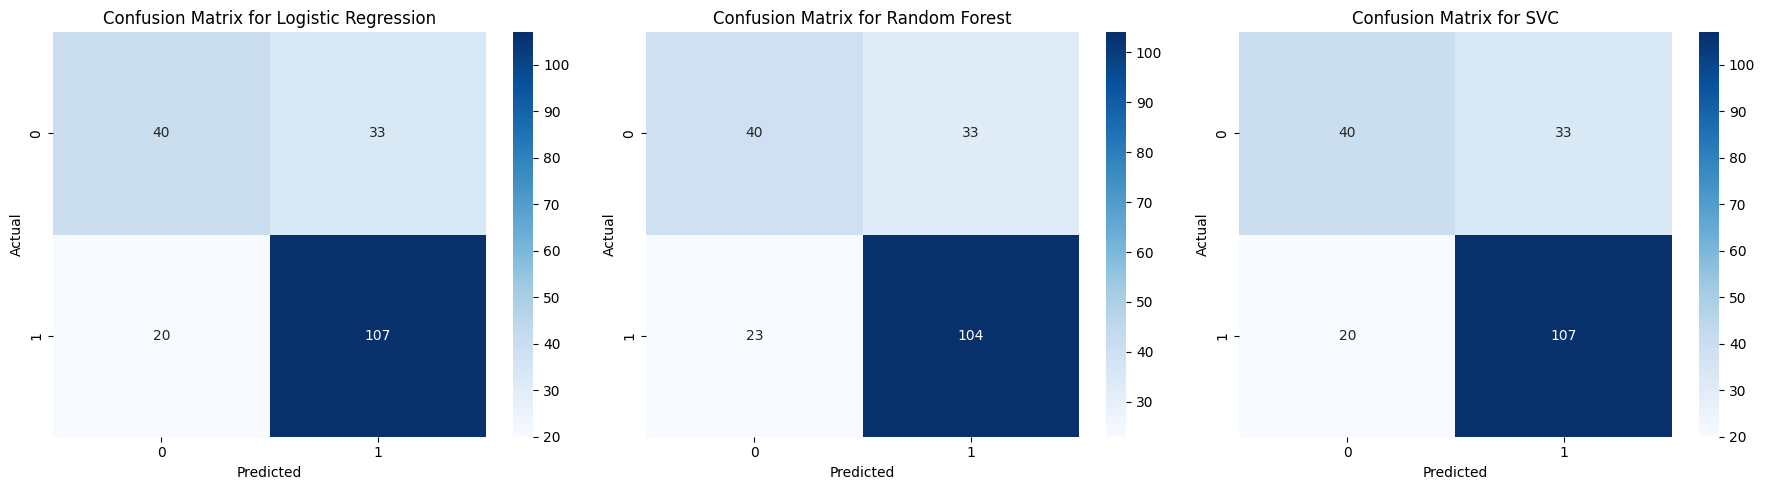

In [45]:
# 5. Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ['Logistic Regression', 'Random Forest', 'SVC']
predictions = [log_reg_pred, rf_clf_pred, svc_clf_pred]

for i, (model_name, pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [46]:
# 6. Classification Report for each model
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, log_reg_pred))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, rf_clf_pred))
print("\nClassification Report for SVC:\n", classification_report(y_test, svc_clf_pred))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        73
           1       0.76      0.84      0.80       127

    accuracy                           0.73       200
   macro avg       0.72      0.70      0.70       200
weighted avg       0.73      0.73      0.73       200


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59        73
           1       0.76      0.82      0.79       127

    accuracy                           0.72       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.71      0.72      0.72       200


Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        73
           1       0.76      0.84      0.80       127

    accuracy                           0.73       200
   